<a href="https://colab.research.google.com/github/Aniket-rohara/insurance_status_pred/blob/main/insurance_status_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing needed libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **Loading data**

In [2]:
insurance_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [3]:
insurance_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# **EDA**

In [5]:
insurance_df.shape

(381109, 12)

In [6]:
insurance_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### THERE ARE NO MISSING VALUES IN DATASET

In [7]:
insurance_df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

###DELETING UNWANTED COLUMNS

In [8]:
insurance_df.drop(columns = ["id"], inplace = True)

In [9]:
insurance_df.shape

(381109, 11)

In [10]:
insurance_df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
insurance_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [12]:
matplotlib.rcParams['font.size'] = 17
sns.set_style('darkgrid')

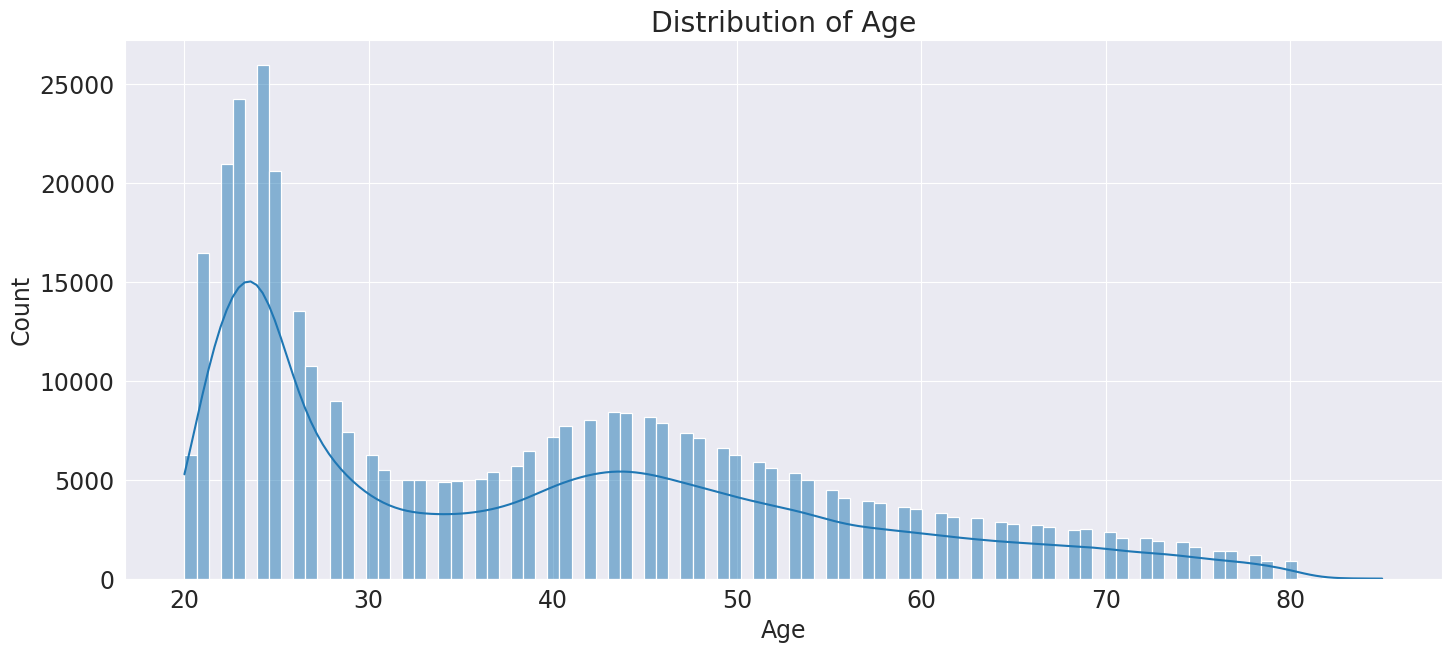

In [13]:
plt.figure(figsize=(17, 7));
sns.histplot(x = 'Age', data = insurance_df, kde='true');
plt.title("Distribution of Age");

## **Conclusion : Mostly the people are from age group 20 to 30**

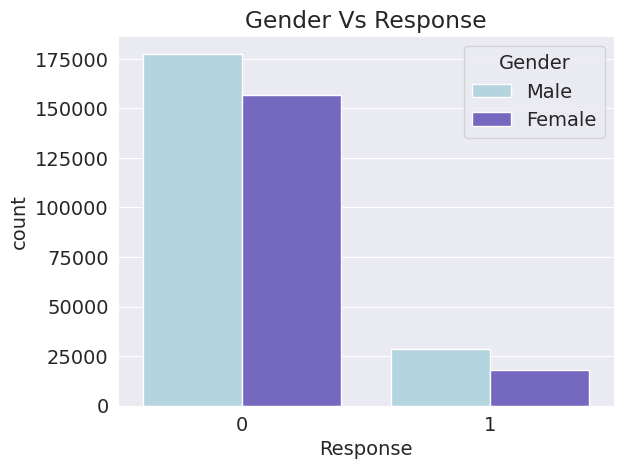

In [14]:
matplotlib.rcParams['font.size'] = 14
sns.countplot(data = insurance_df,
              x = 'Response',
              hue = 'Gender',
             palette={'Female': 'slateblue', 'Male': 'lightblue'});
plt.title("Gender Vs Response");

## **Conclusion : Response variable = 1 represents people who tend to buy insurance. Here more no. of 'Males' tend to buy insurance rather than females**

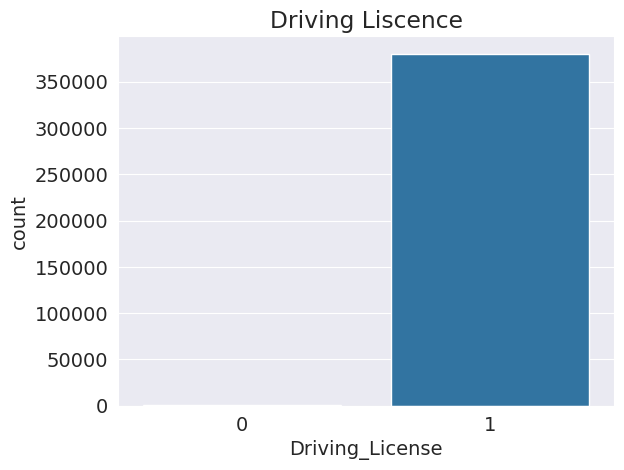

In [15]:
matplotlib.rcParams['font.size'] = 14
sns.countplot(data = insurance_df,
              x = 'Driving_License');
plt.title("Driving Liscence");

In [16]:
insurance_df.Driving_License.value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

## **Conclusion : Mostly everyone here has a learning liscence**

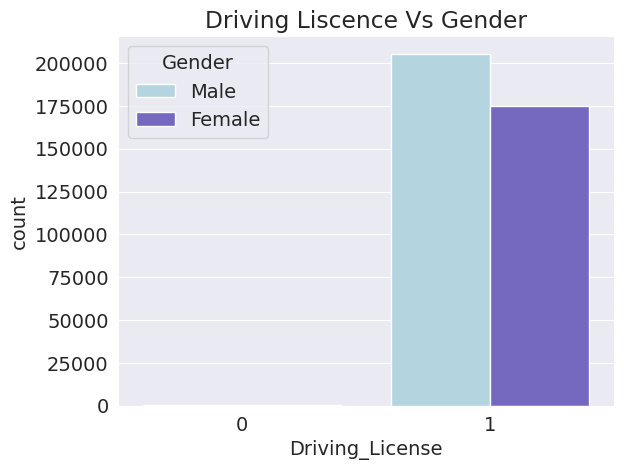

In [17]:
sns.countplot(data = insurance_df,
              x = 'Driving_License',
             hue = 'Gender',
             palette={'Female': 'slateblue', 'Male': 'lightblue'});
plt.title("Driving Liscence Vs Gender");

## **Conclusion : More no. of male have the males have driving liscence as compared to females**

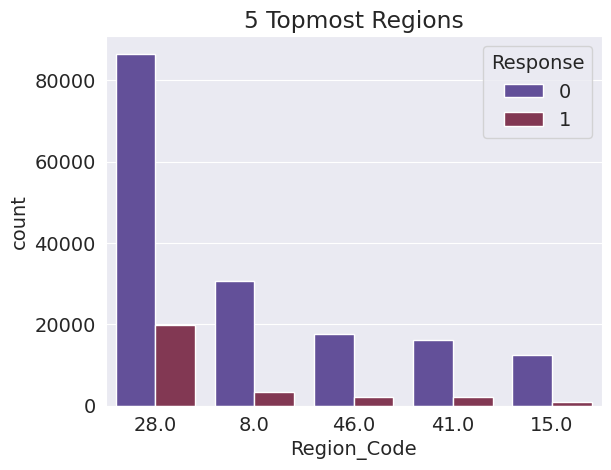

In [18]:
sns.countplot(data = insurance_df,
             x = 'Region_Code',
              palette='twilight',
              hue = 'Response',
             order = insurance_df['Region_Code'].value_counts().head(5).index);
plt.title("5 Topmost Regions");

## **Conclusion : Mostly the People with 'Region_Code = 28.0' tends to buy the insurance**

# **Data Cleaining**

### as there are no missing values so we don't need to do anything regarding that

In [19]:
insurance_df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## From this description we can detect that mostly the outliers are present in 'Age' & 'Annual_Premium' as there is a sudden surge in the data from Q3(75%) to higher fense(max)

## Using 'Box Plot' to view the outliers

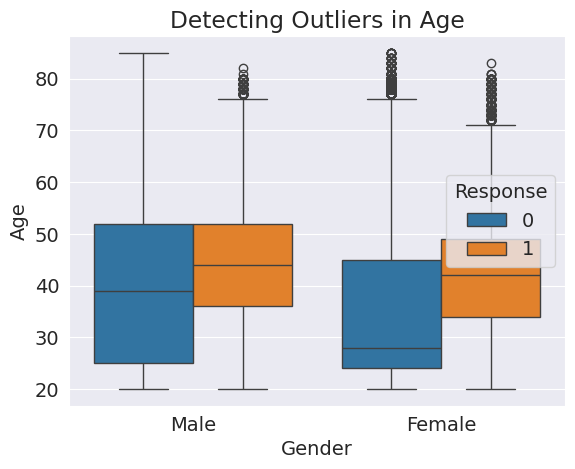

In [20]:
sns.boxplot(data=insurance_df, x="Gender", y="Age", hue="Response");
plt.title("Detecting Outliers in Age");

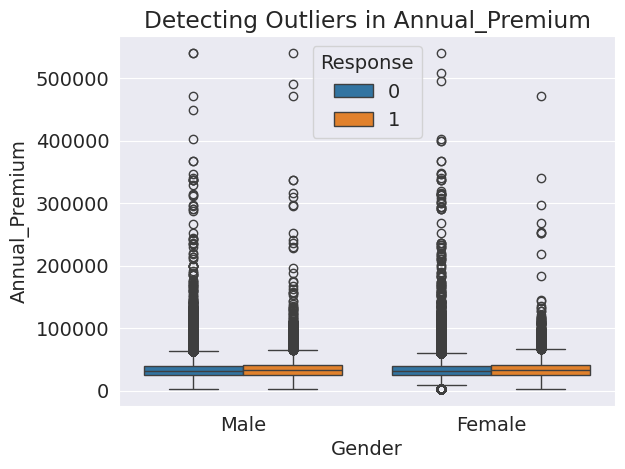

In [21]:
sns.boxplot(data=insurance_df, x="Gender", y="Annual_Premium", hue="Response");
plt.title("Detecting Outliers in Annual_Premium");

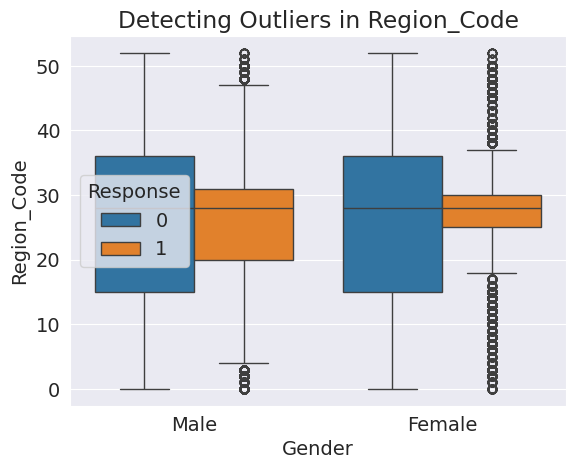

In [22]:
sns.boxplot(data=insurance_df, x="Gender", y="Region_Code", hue="Response");
plt.title("Detecting Outliers in Region_Code");

## Using 'z-score' Method to remove Outliers

In [23]:
numeric_cols = insurance_df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    z_score_col = f'{col}_z_score'
    insurance_df[z_score_col] = (insurance_df[col] - insurance_df[col].mean()) / insurance_df[col].std()

In [24]:
insurance_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_z_score,Driving_License_z_score,Region_Code_z_score,Previously_Insured_z_score,Annual_Premium_z_score,Policy_Sales_Channel_z_score,Vintage_z_score,Response_z_score
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0.333777,0.046208,0.121784,-0.919637,0.574538,-1.587232,0.748794,2.675636
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,2.396748,0.046208,-1.767876,-0.919637,0.172636,-1.587232,0.342442,-0.373742
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0.527180,0.046208,0.121784,-0.919637,0.449053,-1.587232,-1.521996,2.675636
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,-1.148983,0.046208,-1.163185,1.087383,-0.113018,0.737320,0.581473,-0.373742
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,-0.633241,0.046208,1.104408,1.087383,-0.178258,0.737320,-1.378578,-0.373742


### Here we have calclulated z-scores for all numerical columns

In [25]:
# SETTING RANDOM THRESHOLDS

upper_limit = 2
lower_limit = -1

In [26]:
df = insurance_df[((insurance_df['Age_z_score'] < upper_limit) &
                    (insurance_df['Age_z_score'] > lower_limit)) |
                 ((insurance_df['Region_Code_z_score'] < upper_limit) &
                  (insurance_df['Region_Code_z_score'] > lower_limit)) |
                 ((insurance_df['Annual_Premium_z_score'] < upper_limit) &
                  (insurance_df['Annual_Premium_z_score'] > lower_limit))]

In [27]:
insurance_df.shape

(381109, 19)

In [28]:
df.shape

(377971, 19)

### Hence Outliers are removed

In [29]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Age_z_score',
       'Driving_License_z_score', 'Region_Code_z_score',
       'Previously_Insured_z_score', 'Annual_Premium_z_score',
       'Policy_Sales_Channel_z_score', 'Vintage_z_score', 'Response_z_score'],
      dtype='object')

### Dropping the z-scores column

In [30]:
df.drop(columns = ['Age_z_score',
       'Driving_License_z_score', 'Region_Code_z_score',
       'Previously_Insured_z_score', 'Annual_Premium_z_score',
       'Policy_Sales_Channel_z_score', 'Vintage_z_score', 'Response_z_score'], inplace = True)

In [31]:
df.shape

(377971, 11)

# **Feature Engineering**

In [32]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Encoding 'Gender' feature

In [33]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [34]:
gender_mapping = {'Male' : 0, 'Female' : 1}
df['Gender'] = df['Gender'].map(gender_mapping)

In [35]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Encoding 'Vehicle_Age' feature

In [36]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [37]:
df[['Vehicle_Age_1_to_2yr', 'Vehicle_Age_<_1yr']] = (pd.get_dummies(df['Vehicle_Age'], drop_first=True)).astype(int)
df.drop(columns = ['Vehicle_Age'], inplace = True)

In [38]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1_to_2yr,Vehicle_Age_<_1yr
0,0,44,1,28.0,0,Yes,40454.0,26.0,217,1,0,1
1,0,76,1,3.0,0,No,33536.0,26.0,183,0,0,0
2,0,47,1,28.0,0,Yes,38294.0,26.0,27,1,0,1
3,0,21,1,11.0,1,No,28619.0,152.0,203,0,1,0
4,1,29,1,41.0,1,No,27496.0,152.0,39,0,1,0


### Encoding 'Vehicle_Damage' feature

In [39]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [40]:
damage_mapping = {'No' : 0, 'Yes' : 1}
df['Vehicle_Damage'] = df['Vehicle_Damage'].map(damage_mapping)

In [41]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1_to_2yr,Vehicle_Age_<_1yr
0,0,44,1,28.0,0,1,40454.0,26.0,217,1,0,1
1,0,76,1,3.0,0,0,33536.0,26.0,183,0,0,0
2,0,47,1,28.0,0,1,38294.0,26.0,27,1,0,1
3,0,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
4,1,29,1,41.0,1,0,27496.0,152.0,39,0,1,0


### We have encoded all categorical features into numerical ones

# **Pre-Processing**

In [42]:
scaler = MinMaxScaler()

In [43]:
scaler.fit(df)

MinMaxScaler()

In [44]:
df[:] = scaler.transform(df)

In [45]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1_to_2yr,Vehicle_Age_<_1yr
0,0,0.369231,1,0.538462,0,1,0.070366,0.154321,0.716263,1,0,1
1,0,0.861538,1,0.057692,0,0,0.057496,0.154321,0.598616,0,0,0
2,0,0.415385,1,0.538462,0,1,0.066347,0.154321,0.058824,1,0,1
3,0,0.015385,1,0.211538,1,0,0.048348,0.932099,0.667820,0,1,0
4,1,0.138462,1,0.788462,1,0,0.046259,0.932099,0.100346,0,1,0


### So we have scaled our data using MinMaxscaler which scales our data between 0 to 1
### MIN MAX SCALER uses following formula :

### scaled_x = [(xi - min)/(max - min)](max_range - min_range) + min_range

In [46]:
# Input and output

X = df.drop(columns = ['Response'])
y = df['Response']

In [47]:
y.value_counts()

Response
0    331408
1     46563
Name: count, dtype: int64

### To handle this imbalance we will use SMOTE technique

## Oversampling Minority Class using SMOTE

In [48]:
smot = SMOTE(sampling_strategy='minority')

In [49]:
X, y = smot.fit_resample(X, y)

In [50]:
y.value_counts()

Response
1    331408
0    331408
Name: count, dtype: int64

### Now the classes are balanced

# **MODEL IMPLEMENTATION**

In [51]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [52]:
X_val, X_test, y_val, y_test= train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [53]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape ,y_test.shape

((463971, 11), (99422, 11), (99423, 11), (463971,), (99422,), (99423,))

### Using Cross Validation to determine the best suitable algorithm

In [54]:
def kfold(estimator, inp, target):
    return cross_val_score(estimator, inp, target).mean()

In [55]:
kfold(LogisticRegression(), X_val, y_val) * 100

78.17083181016656

In [56]:
kfold(GaussianNB(), X_val, y_val) * 100

78.30259285601522

In [57]:
kfold(MultinomialNB(), X_val, y_val) * 100

75.79007021210829

In [58]:
kfold(RandomForestClassifier(n_jobs=1, random_state=42), X_val, y_val) * 100

85.59675213548108

In [59]:
kfold( KNeighborsClassifier(n_neighbors=2, p = 2, metric='minkowski'), X_val, y_val) * 100

77.059407373933

### **So from these analysis we can say that "Random Forest Classifer" gives the best accuracy"**

## Hyperparameter Tuning using GridSearchCV - To find the best parameters

In [62]:
classifier = GridSearchCV(RandomForestClassifier(n_jobs=1, random_state=42),{
    'max_depth':[10, 20],
    'max_features' : [3, 5],
    'min_samples_split' : [2, 3]
})

In [63]:
classifier.fit(X_val, y_val)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=1, random_state=42),
             param_grid={'max_depth': [10, 20], 'max_features': [3, 5],
                         'min_samples_split': [2, 3]})

In [64]:
clf_df = pd.DataFrame(classifier.cv_results_)

In [65]:
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [66]:
clf_df[['param_max_depth', 'param_max_features', 'param_min_samples_split', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending=False).head(5)

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score
6,20,5,2,0.848374
7,20,5,3,0.847981
4,20,3,2,0.843013
5,20,3,3,0.842811
3,10,5,3,0.823439


### So we can see that high value of max_depth and max_features give high accuracy

## Model Training

In [67]:
model = RandomForestClassifier(n_jobs=1,random_state=42)

In [68]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1, random_state=42)

In [69]:
model.score(X_test, y_test) * 100

90.33925751586655

In [70]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### So our model is treated on this above parameters

## Making Predictions

In [71]:
y_pred = model.predict(X_test)

In [72]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

# **Model Evaluation**

In [73]:
print(f'Model accuracy : {accuracy_score(y_test, y_pred) * 100}')

Model accuracy : 90.33925751586655


## So our model got the accuracy of "90.33%"

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     49712
           1       0.88      0.93      0.91     49711

    accuracy                           0.90     99423
   macro avg       0.90      0.90      0.90     99423
weighted avg       0.90      0.90      0.90     99423



*   As there is not drastic gap between f1-score for class 0 and class 1 hence we can say that the class imbalance have been handled properly
*   We are getting the accuracy of 90%
*   A precision of 93% for class 0 and 88%for classs 1

In [75]:
cf = confusion_matrix(y_test, y_pred)

In [76]:
cf

array([[43357,  6355],
       [ 3250, 46461]])

In [77]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

In [78]:
cm

array([[0.87216366, 0.12783634],
       [0.06537788, 0.93462212]])

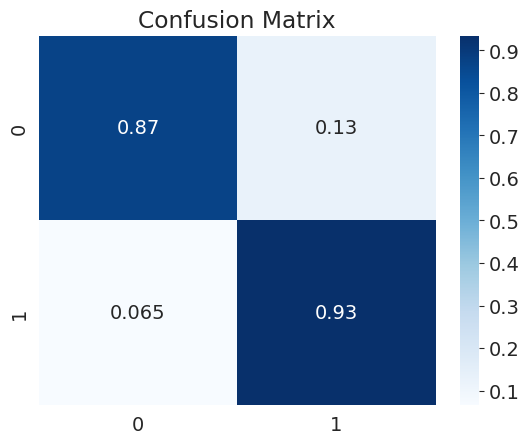

In [79]:
plt.title('Confusion Matrix');
sns.heatmap(cm, cmap='Blues', annot = True);

# **CONCLUSION:**
### Model Accuracy : 90.3%
### We have very less true negatives and false positives
### Handled Dataset imbalance resulting is good f1-score
### A precision of 93% for class 0 and 88%for classs 1